In [36]:
# Importing pandas + numpy
import pandas as pd
import numpy as np
# Importing sklearn packages for models + testing
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
# Importing seaborn + matplot
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
! git clone https://github.com/DS3001/group12

fatal: destination path 'group12' already exists and is not an empty directory.


In [4]:
# Reading in csv data for training and testing
df_train = pd.read_csv('./group12/project_2/data/training_data.csv')
df_test = pd.read_csv('./group12/project_2/data/testing_data.csv')

In [5]:
# Going through each variable and checking for missing variables and any incorrect data
print(df_train['age'].unique(),'\n')
print(df_train['age'].value_counts(), '\n')
print(df_train['age'].describe(),'\n')

[3.60e+01 4.50e+01 5.80e+01 6.10e+01 7.80e+01 3.40e+01 3.70e+01 6.30e+01
 7.20e+01 5.90e+01 2.60e+01 4.60e+01 1.70e+01 2.90e+01 1.60e+01 4.40e+01
 7.90e+01 7.30e+01 3.00e+01 5.00e+00 3.20e-01 1.30e+01 2.20e+01 8.00e+01
 6.20e+01 6.70e+01 5.60e+01 1.10e+01 4.00e+01 2.40e-01 9.00e+00 6.00e+01
 7.40e+01 2.80e+01 5.10e+01 5.20e+01 3.20e+01 2.50e+01 8.20e+01 3.50e+01
 2.30e+01 4.70e+01 5.50e+01 2.70e+01 6.00e+00 3.30e+01 4.90e+01 5.30e+01
 4.20e+01 5.70e+01 6.60e+01 7.10e+01 1.60e-01 5.40e+01 3.00e+00 7.00e+00
 6.40e+01 4.30e+01 3.10e+01 2.10e+01 6.50e+01 1.80e+01 4.10e+01 8.10e+01
 1.00e+00 2.40e+01 3.90e+01 7.00e+01 2.00e+00 4.80e+01 8.00e-02 3.80e+01
 7.50e+01 1.88e+00 1.00e+01 1.20e+01 6.40e-01 2.00e+01 5.00e+01 7.70e+01
 1.90e+01 1.08e+00 8.00e+00 6.90e+01 6.80e+01 1.40e+01 4.00e+00 7.60e+01
 1.16e+00 1.80e+00 1.72e+00 1.32e+00 1.50e+01 4.00e-01 8.80e-01 7.20e-01
 5.60e-01 1.24e+00 1.64e+00 1.56e+00 4.80e-01 1.40e+00 8.00e-01 1.48e+00] 

78.00    89
51.00    75
53.00    73
45.00    73


In [6]:

# Replacing values with whole numbers
values_to_replace = [1.40, 1.08, 1.16, 1.32, 1.24, 1.48]
replacement_value = 1

df_train['age'] = df_train['age'].replace(values_to_replace, replacement_value)
df_test['age'] = df_train['age'].replace(values_to_replace, replacement_value)

values_to_replace2 = [0.40, 0.08, 0.48, 0.16, 0.32, 0.88, 0.72, 0.56, 0.24, 0.64, 0.8]
replacement_value2 = 0

df_train['age'] = df_train['age'].replace(values_to_replace2, replacement_value2)
df_test['age'] = df_train['age'].replace(values_to_replace2, replacement_value2)


values_to_replace3 = [1.88, 1.72, 1.64, 1.56, 1.8]
replacement_value3 = 2

df_train['age'] = df_train['age'].replace(values_to_replace3, replacement_value3)
df_test['age'] = df_train['age'].replace(values_to_replace3, replacement_value3)


print(df_train['avg_glucose_level'].unique(),'\n')
print(df_train['avg_glucose_level'].value_counts(), '\n')
print(df_train['avg_glucose_level'].describe(),'\n')

[ 65.87  68.66 170.93 ...  80.13 210.4   86.94] 

93.88     6
93.55     4
80.08     4
88.83     4
83.16     4
         ..
220.64    1
70.32     1
55.62     1
118.75    1
86.94     1
Name: avg_glucose_level, Length: 3327, dtype: int64 

count    4087.000000
mean      106.010396
std        45.047912
min        55.120000
25%        77.295000
50%        92.000000
75%       113.845000
max       271.740000
Name: avg_glucose_level, dtype: float64 



In [7]:
print(df_train['bmi'].unique(),'\n')
print(df_train['bmi'].value_counts(), '\n')
print(df_train['bmi'].describe(),'\n')


[32.2 25.3 30.7 27.1 30.6 30.4 41.7 22.3 35.9 33.8 29.4 28.9 26.2 22.5
 55.7 26.1 22.4 33.2 24.8 20.9 22.  27.6 35.8 32.8 15.9 16.2 41.3 22.9
 19.5 31.1 31.9 30.9 15.7 24.6 18.6 27.4 25.6 25.4 25.5 26.3 35.2  nan
 28.3 32.3 18.8 33.7 30.8 41.1 31.2 33.3 20.8 19.4 46.5 28.7 23.6 31.7
 29.9 26.7 28.5 29.3 29.6 19.2 34.9 32.4 17.4 36.1 43.2 20.2 31.4 30.2
 20.4 30.5 34.7 26.5 35.5 33.9 29.2 24.9 17.6 23.  19.8 23.5 32.7 39.4
 35.3 30.1 27.2 29.  36.6 33.1 38.4 20.  28.6 23.9 23.2 23.7 60.9 22.1
 25.9 26.  31.5 16.7 31.  43.6 24.5 32.  35.1 18.3 44.7 54.7 39.7 26.4
 34.3 17.7 32.1 35.7 40.1 16.9 35.  38.1 71.9 43.7 19.1 26.6 17.9 27.9
 25.8 21.  28.8 49.3 37.2 23.1 40.5 35.6 20.7 34.  36.4 20.1 37.3 22.2
 17.3 28.  25.  21.8 28.1 39.2 32.6 25.1 41.2 26.9 24.1 38.5 33.6 17.
 33.4 18.1 34.8 30.3 16.  29.5 18.2 27.8 39.  24.3 21.9 37.8 23.4 22.8
 21.1 24.7 43.9 21.5 22.6 20.3 18.4 38.6 19.  57.2 33.  29.1 48.8 16.4
 21.4 29.8 17.2 45.  13.7 38.  15.6 31.8 43.  24.  42.3 16.6 23.8 44.8
 27.3 2

In [8]:
# Replacing NaN values with the average
df_train['bmi'] = df_train['bmi'].fillna(28.9)
df_test['bmi'] = df_test['bmi'].fillna(28.9)


print(df_train['ever_married'].unique(),'\n')
print(df_train['ever_married'].value_counts(), '\n')
print(df_train['ever_married'].describe(),'\n')

['Yes' 'No'] 

Yes    2686
No     1401
Name: ever_married, dtype: int64 

count     4087
unique       2
top        Yes
freq      2686
Name: ever_married, dtype: object 



In [9]:

print(df_train['gender'].unique(),'\n')
print(df_train['gender'].value_counts(), '\n')
print(df_train['gender'].describe(),'\n')

['Male' 'Female' 'Other'] 

Female    2398
Male      1688
Other        1
Name: gender, dtype: int64 

count       4087
unique         3
top       Female
freq        2398
Name: gender, dtype: object 



In [10]:
print(df_train['heart_disease'].unique(),'\n')
print(df_train['heart_disease'].value_counts(), '\n')
print(df_train['heart_disease'].describe(),'\n')

[0 1] 

0    3858
1     229
Name: heart_disease, dtype: int64 

count    4087.000000
mean        0.056031
std         0.230010
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: heart_disease, dtype: float64 



In [11]:

print(df_train['hypertension'].unique(),'\n')
print(df_train['hypertension'].value_counts(), '\n')
print(df_train['hypertension'].describe(),'\n')

[0 1] 

0    3687
1     400
Name: hypertension, dtype: int64 

count    4087.000000
mean        0.097871
std         0.297177
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: hypertension, dtype: float64 



In [12]:
print(df_train['id'].unique(),'\n')
print(df_train['id'].value_counts(), '\n')
print(df_train['id'].describe(),'\n')

[68685 59058 46068 ... 37060 29552 14499] 

68685    1
25446    1
51524    1
59743    1
5043     1
        ..
57944    1
53976    1
52419    1
19907    1
14499    1
Name: id, Length: 4087, dtype: int64 

count     4087.000000
mean     36383.068265
std      21189.857848
min         67.000000
25%      17417.500000
50%      36814.000000
75%      54584.500000
max      72940.000000
Name: id, dtype: float64 



In [13]:
print(df_train['Residence_type'].unique(),'\n')
print(df_train['Residence_type'].value_counts(), '\n')
print(df_train['Residence_type'].describe(),'\n')

['Urban' 'Rural'] 

Urban    2052
Rural    2035
Name: Residence_type, dtype: int64 

count      4087
unique        2
top       Urban
freq       2052
Name: Residence_type, dtype: object 



In [14]:
print(df_train['smoking_status'].unique(),'\n')
print(df_train['smoking_status'].value_counts(), '\n')
print(df_train['smoking_status'].describe(),'\n')

['formerly smoked' 'never smoked' 'Unknown' 'smokes'] 

never smoked       1505
Unknown            1241
formerly smoked     699
smokes              642
Name: smoking_status, dtype: int64 

count             4087
unique               4
top       never smoked
freq              1505
Name: smoking_status, dtype: object 



In [15]:
print(df_train['work_type'].unique(),'\n')
print(df_train['work_type'].value_counts(), '\n')
print(df_train['work_type'].describe(),'\n')

['Govt_job' 'Self-employed' 'Private' 'children' 'Never_worked'] 

Private          2329
Self-employed     667
children          542
Govt_job          534
Never_worked       15
Name: work_type, dtype: int64 

count        4087
unique          5
top       Private
freq         2329
Name: work_type, dtype: object 



In [16]:
print(df_train['stroke'].unique(),'\n')
print(df_train['stroke'].value_counts(), '\n')
print(df_train['stroke'].describe(),'\n')

[0 1] 

0    3888
1     199
Name: stroke, dtype: int64 

count    4087.000000
mean        0.048691
std         0.215248
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: stroke, dtype: float64 



**Model: Decision Tree Regressor + Linear Model with Polynomial Features (Combined using Residual Fitting)**

In [17]:
y_train = df_train['stroke']
X_train = df_train.drop('stroke',axis=1)
y_test = df_test['stroke']
X_test = df_test.drop('stroke',axis=1)

In [38]:
# Selecting numeric data
X_train_numeric = X_train.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]
X_test_numeric = X_test.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]

# Polynomial Features for Training Data
expander = PolynomialFeatures(degree=2, include_bias=False)
Z_train_numeric = expander.fit_transform(X_train_numeric)
names = expander.get_feature_names_out()
continuous_train = pd.DataFrame(data=Z_train_numeric, columns=names)

# Creating Dummies for Training Data
dummies_train = pd.get_dummies(X_train[['work_type', 'Residence_type', 'smoking_status']], drop_first=True)

# Concatenating Polynomial and Dummies for Training Data
Z_train = pd.concat([continuous_train, dummies_train], axis=1)

# Polynomial Features for Test Data
Z_test_numeric = expander.transform(X_test_numeric)
continuous_test = pd.DataFrame(data=Z_test_numeric, columns=names)

# Creating Dummies for Testing Data
dummies_test = pd.get_dummies(X_test[['work_type', 'Residence_type', 'smoking_status']], drop_first=True)

# Concatenating Polynomial and Dummies for Test Data
Z_test = pd.concat([continuous_test, dummies_test], axis=1)

# Linear Regression Model
reg = LinearRegression().fit(Z_train, y_train)
linear_predictions = reg.predict(Z_test)

# Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=5)
cart = model.fit(Z_train, y_train)
tree_predictions = model.predict(Z_test)

# Calculate Residuals
residuals = y_test - ((linear_predictions + tree_predictions) / 2)

# Fit a model on Residuals
residual_model = DecisionTreeRegressor(max_depth=5)
residual_model.fit(Z_test, residuals)

# Predict on Test Set Using the Residual Model
residual_predictions = residual_model.predict(Z_test)

# Combine Initial Predictions with Residual Predictions
combined_predictions = (linear_predictions + tree_predictions) / 2 + residual_predictions

# Calculate R-squared value
r_squared = r2_score(y_test, combined_predictions)
print('R-squared with Residual Fitting:', r_squared)

# Calculate RMSE
combined_rmse = mean_squared_error(y_test, combined_predictions, squared=False)
print('Combined RMSE with Residual Fitting:', combined_rmse)


R-squared with Residual Fitting: 0.17554569630981853
Combined RMSE with Residual Fitting: 0.19577132639750514


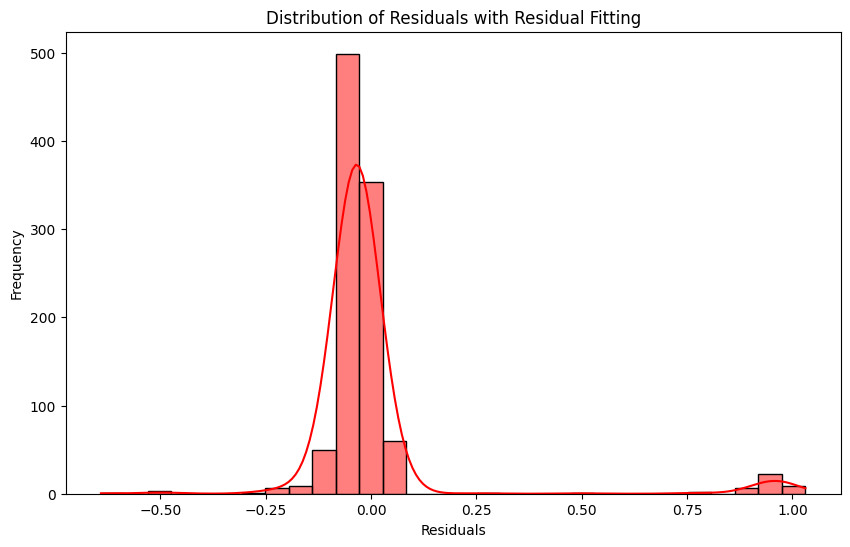

In [35]:
# Visualization of Distribution of Residuals
residuals = y_test - combined_predictions

# Residuals Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='red', bins=30)
plt.title('Distribution of Residuals with Residual Fitting')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

**Failed Model: Decision Tree Regressor + Linear Model with Polynomial Features (Combined using Regular Averaging)**

In [19]:
# Selecting numeric data
X_train_numeric = X_train.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]
X_test_numeric = X_test.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]

# Polynomial Features for Training Data
expander = PolynomialFeatures(degree=2, include_bias=False)
Z_train_numeric = expander.fit_transform(X_train_numeric)
names = expander.get_feature_names_out()
continuous_train = pd.DataFrame(data=Z_train_numeric, columns=names)

# Creating Dummies for Training Data
dummies_train = pd.get_dummies(X_train[['work_type', 'Residence_type', 'smoking_status']], drop_first=True)

# Concatenating Polynomial and Dummies for Training Data
Z_train = pd.concat([continuous_train, dummies_train], axis=1)

# Polynomial Features for Test Data
Z_test_numeric = expander.transform(X_test_numeric)
continuous_test = pd.DataFrame(data=Z_test_numeric, columns=names)

# Creating Dummies for Testing Data
dummies_test = pd.get_dummies(X_test[['work_type', 'Residence_type', 'smoking_status']], drop_first=True)

# Concatenating Polynomial and Dummies for Test Data
Z_test = pd.concat([continuous_test, dummies_test], axis=1)

# Linear Regression Model
reg = LinearRegression().fit(Z_train, y_train)
linear_predictions = reg.predict(Z_test)

# Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=5)
cart = model.fit(Z_train, y_train)
tree_predictions = model.predict(Z_test)

# Combining Predictions (Simple Averaging)
combined_predictions = (linear_predictions + tree_predictions) / 2

# Calculate RMSE for the combined predictions
combined_rmse = mean_squared_error(y_test, combined_predictions, squared=False)
print('Combined RMSE:', combined_rmse)


Combined RMSE: 0.226764174952972


**Failed Model: Decision Tree Regressor + Linear Model with Polynomial Features (Combined using Weighted Averaging)**

In [20]:
# Selecting numeric data
X_train_numeric = X_train.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]
X_test_numeric = X_test.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]

# Polynomial Features for Training Data
expander = PolynomialFeatures(degree=2, include_bias=False)
Z_train_numeric = expander.fit_transform(X_train_numeric)
names = expander.get_feature_names_out()
continuous_train = pd.DataFrame(data=Z_train_numeric, columns=names)

# Creating Dummies for Training Data
dummies_train = pd.get_dummies(X_train[['work_type', 'Residence_type', 'smoking_status']], drop_first=True)

# Concatenating Polynomial and Dummies for Training Data
Z_train = pd.concat([continuous_train, dummies_train], axis=1)

# Polynomial Features for Test Data
Z_test_numeric = expander.transform(X_test_numeric)
continuous_test = pd.DataFrame(data=Z_test_numeric, columns=names)

# Creating Dummies for Testing Data
dummies_test = pd.get_dummies(X_test[['work_type', 'Residence_type', 'smoking_status']], drop_first=True)

# Concatenating Polynomial and Dummies for Test Data
Z_test = pd.concat([continuous_test, dummies_test], axis=1)

# Linear Regression Model
reg = LinearRegression().fit(Z_train, y_train)
linear_predictions = reg.predict(Z_test)

# Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=5)
cart = model.fit(Z_train, y_train)
tree_predictions = model.predict(Z_test)

weight_linear = 0.6
weight_tree = 0.4

# Combine predictions using weighted averaging
weighted_predictions = (weight_linear * linear_predictions) + (weight_tree * tree_predictions)

# Calculate RMSE for the combined predictions
combined_rmse = mean_squared_error(y_test, weighted_predictions, squared=False)
print('Combined RMSE:', combined_rmse)

Combined RMSE: 0.22585807604184213
